In [2]:
#Import
import numpy as np
import matplotlib.pyplot as plt
#import scipy.interpolate
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
#import pandas as pd
#from math import *
#import locale
#import webbrowser
#from locale import atof

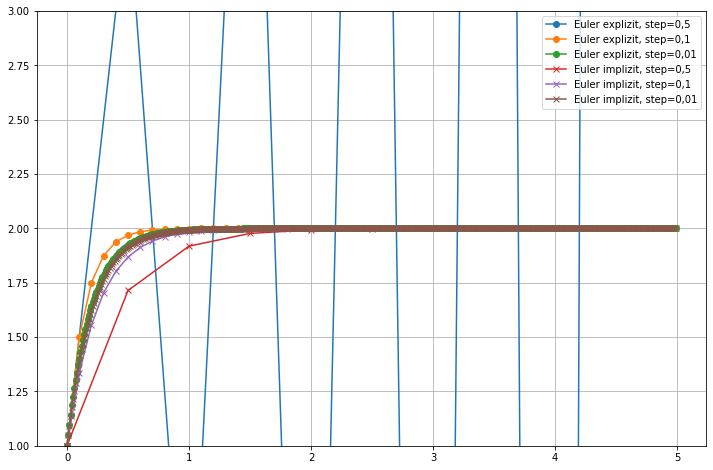

In [2]:
# Beispiel aus VL explizit:
def Explizit_Euler(step):
    t2 = np.arange(0,5,step) # GroberZeitvektormith=step
    y2 = 1 + np.zeros(len(t2))
    for i in range(1,len(t2)):
        y2[i] = y2[i-1] + step*(-5*(y2[i-1]-2))
    return y2,t2

def Implizit_Euler(step):
    t2 = np.arange(0,5,step) # GroberZeitvektormith=step
    y2 = 1 + np.zeros(len(t2))
    for i in range(1,len(t2)):
        y2[i] = (y2[i-1] + step*10)/(1+5*step)
    return y2,t2


plt.figure(figsize=(12,8))

plt.plot(Explizit_Euler(0.5)[1],Explizit_Euler(0.5)[0],'o-',label='Euler explizit, step=0,5')
plt.plot(Explizit_Euler(0.1)[1],Explizit_Euler(0.1)[0],'o-',label='Euler explizit, step=0,1')
plt.plot(Explizit_Euler(0.01)[1],Explizit_Euler(0.01)[0],'o-',label='Euler explizit, step=0,01')
plt.plot(Implizit_Euler(0.5)[1],Implizit_Euler(0.5)[0],'x-',label='Euler implizit, step=0,5')
plt.plot(Implizit_Euler(0.1)[1],Implizit_Euler(0.1)[0],'x-',label='Euler implizit, step=0,1')
plt.plot(Implizit_Euler(0.01)[1],Implizit_Euler(0.01)[0],'x-',label='Euler implizit, step=0,01')
plt.ylim(1,3)
plt.grid()
plt.legend()

In [1]:
#Aufgabe 2 aus der VL

def func1(t,y):
    y1p = y[1]
    y2p = 0.3*np.cos(t*1.3)-0.2*y[1]+1*y[0]-1*y[0]**3
    return [y1p,y2p]
def func2(t,y):
    y1p = y[1]
    y2p = 0.3*np.cos(t*1.4)-0.2*y[1]+1*y[0]-1*y[0]**3
    return [y1p,y2p]
    
sol1 = solve_ivp(func1,t_span=(0,120),y0=[0,0])
sol2 = solve_ivp(func2,t_span=(0,120),y0=[0,0])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12,12))

ax1.plot(sol1.t,sol1.y[0,:],label='solve_ivp, Phi=1,3')
ax1.legend()
ax2.plot(sol2.t,sol2.y[0,:],label='solve_ivp, Phi=1,4')
ax2.legend()
ax3.plot(sol1.y[0],sol1.y[1],label='solve_ivp, Phasendiagramm, Phi=1,3')
ax3.legend()
ax4.plot(sol2.y[0],sol2.y[1],label='solve_ivp, Phasendiagramm, Phi=1,4')
ax4.legend()


NameError: name 'solve_ivp' is not defined

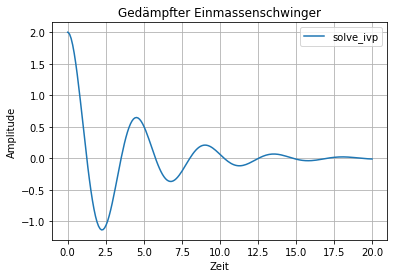

In [17]:
#6.1
def func1(t,y):
    y1p = y[1]
    y2p = -0.5*y[1]-2*y[0]
    return [y1p,y2p]

sol1 = solve_ivp(func1,t_span=(0,20),y0=[2,0],max_step=0.1)

plt.plot(sol1.t,sol1.y[0],label='solve_ivp')
plt.grid()
plt.xlabel('Zeit') 
plt.ylabel('Amplitude')
plt.title('Gedämpfter Einmassenschwinger')
plt.legend()

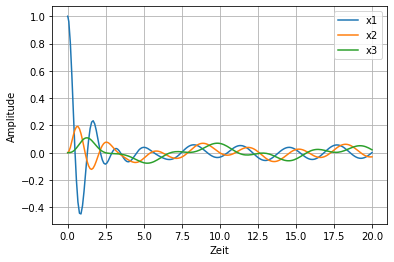

In [53]:
#6.2

def func1(t,y):
    y1p = y[1]
    y2p = (1/10)*(-5*np.cos(2*t)-15*y[1]+5*y[3]-140*y[0]+60*y[2])
    y3p = y[3]
    y4p = (1/20)*(5*y[1]-20*y[3]+15*y[5]+60*y[0]-100*y[2]+40*y[4])
    y5p = y[5]
    y6p = (1/30)*(15*y[3]-15*y[5]+40*y[2]-40*y[4])
    return [y1p,y2p,y3p,y4p,y5p,y6p]

sol1 = solve_ivp(func1,t_span=(0,20),y0=[1,0,0,0,0,0],max_step=0.1)
plt.plot(sol1.t,sol1.y[0],label='x1')
plt.plot(sol1.t,sol1.y[2],label='x2')
plt.plot(sol1.t,sol1.y[4],label='x3')
plt.grid()
plt.xlabel('Zeit') 
plt.ylabel('Amplitude')
plt.legend()

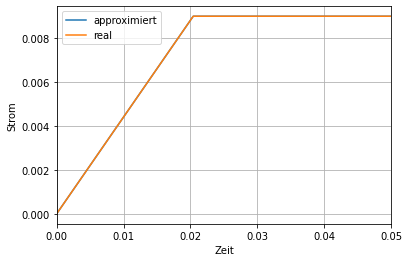

In [86]:
#5.3

def func1(y,t):
    R = 1000
    L = 0.1
    U = -9
    return -R/L*y-U/L

t = np.linspace(0, 1, 50)

def Funktion(t):
    R = 1000
    L = 0.1
    U = 9
    return U/R*(1-np.exp(-R*t/L))

sol1 = odeint(func1, 0, t)
plt.plot(t,sol1[:, 0],label='approximiert')
plt.plot(t,Funktion(t), label='real')
plt.grid()
plt.xlim(0,0.05)
plt.xlabel('Zeit') 
plt.ylabel('Strom')
plt.legend()



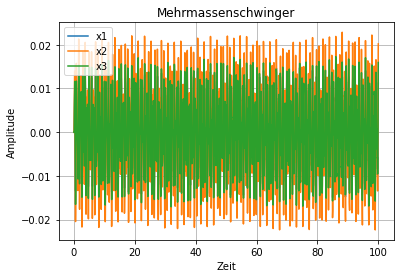

In [25]:
#6.4
omega=9

def func1(t,y):
    c = 1000
    m = 1
    F0 = 5
    y1p = y[1] 
    y2p = c/2*m*(y[2]-3*y[0]+y[4]) 
    y3p = y[3] 
    y4p = c/m*(-y[2]+y[0])+F0/m*np.sin(omega*t) 
    y5p = y[5] 
    y6p = c/m*(-y[4]+y[0])
    return [y1p,y2p,y3p,y4p,y5p,y6p]

sol1 = solve_ivp(func1,t_span=(0,100),y0=[0,0,0,0,0,0],max_step=0.1)

plt.plot(sol1.t,sol1.y[0],label='x1')
plt.plot(sol1.t,sol1.y[2],label='x2')
plt.plot(sol1.t,sol1.y[4],label='x3')
plt.grid()
plt.xlabel('Zeit') 
plt.ylabel('Amplitude')
plt.title('Mehrmassenschwinger')
plt.legend()


infile = open(r'UE6_A4.txt','w')
infile.write('Frequenz: ' + str(omega) + '\n')
for i in range(20):
    infile.write(str(sol1.t)+','+str(sol1.y[0])+','+str(sol1.y[2])+','+str(sol1.y[4]))
infile.close()


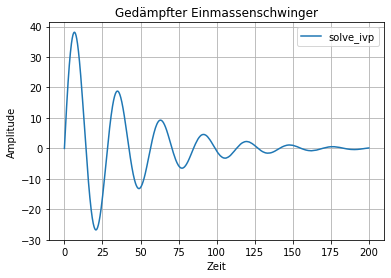

In [51]:
#6.5
omega = 11
def func1(t,y):
    m = 2000
    c = 100
    b = 100
    U0 = 10
    y1p = y[1]
    y2p = -1/m*(c*y[0]-c*U0*np.sin(omega*t)+b*y[1]-b*omega*np.cos(omega*t))
    return [y1p,y2p]

sol1 = solve_ivp(func1,t_span=(0,200),y0=[0,10],max_step=0.1)

plt.plot(sol1.t,sol1.y[0],label='solve_ivp')
plt.grid()
plt.xlabel('Zeit') 
plt.ylabel('Amplitude')
plt.title('Gedämpfter Einmassenschwinger')
plt.legend()

infile = open(r'UE6_A5.csv','w')
infile.write('Frequenz: ' + str(omega) + '\n')
infile.write('Time, Amplitude\n')
for i in range(20):
    infile.write(str(sol1.t)+','+str(sol1.y[0]))
infile.close()